
## NovelAi Stable Diffusion - webui +API AI绘画项目 SD云部署
**torch: 2.2.0+cu121  •  xformers: 0.0.24**

**创建日期：2022年11月18日**

**上次更新：2024年2月26日**
## <span style="color:red; font-weight:bold;"> 全网唯一全免费SD云端部署平台</span>
## [使用教程(视频)](https://www.bilibili.com/video/BV1b34y1N7Sf/?spm_id_from=333.999.0.0)
## [使用教程(文章)[部分内容已过时]](https://zhuanlan.zhihu.com/p/659394256)
## [发布地址](https://www.kaggle.com/code/qq2575044704/stable-diffusion-webui-novelai-edited-version-2)
<!--- 
这里是作者的署名和群号码，未经同意请勿删除，删一句家里人少一个
--->
<!--- 
倒卖狗全家死光
--->


### 请先看使用教程！如果你是手机端请用Edge浏览器并且调成电脑版UI
> ## 使用方法：使用Run All或者Save Version运行，从内网穿透链接进入WebUI
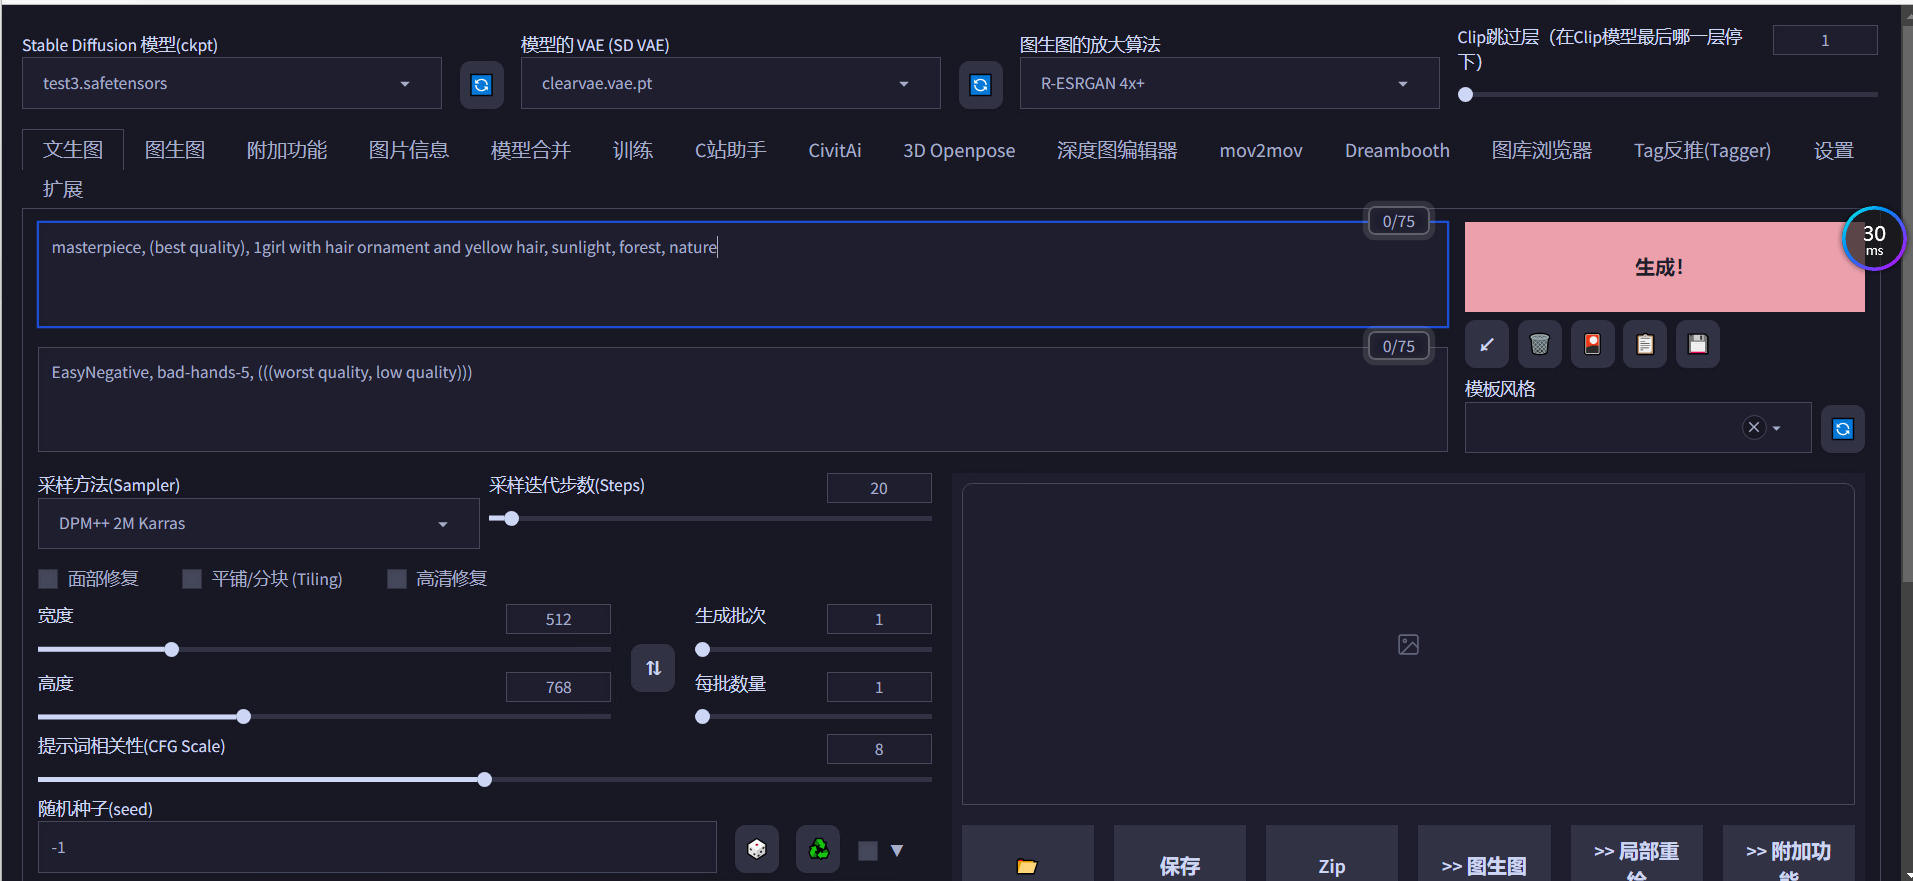

## Ai绘画模型站：
## [Civitai](http://civitai.com) （C站）
 
### [huggingface](http://huggingface.co)
## 未经同意禁止将源代码用于出售，一经发现必定追究
## **使用前请注意：**
> * ### kaggle每周提供了免费的GPU，但请不要滥用免费资源

> * Kaggle provides 30h GPU per week, but please do not abuse free resources

> * ### 不建议生成违返法律的图片【尽可能避开违禁词】。

> * do not generate images that against the kaggle rules。

> * ### 如果报错了，不妨重新看一遍教程

> * I didn't make a English version of this notebook, If you are English user, you will probably need a translator. and learn how to use this
<!--- 
这里是作者的署名和群号码，未经同意请勿删除，删一句家里人少一个
--->
<!--- 
倒卖狗全家死光
--->

In [3]:
# 定义配置文件内容
#使用的库
from pathlib import Path
import subprocess
import pandas as pd
import shutil
import os
import time
import re
import gc
import requests
import zipfile
import threading
import time
import socket
from concurrent.futures import ProcessPoolExecutor
use_frpc = True
frpconfigfile = '/kaggle/input/aihua-5000/frpc_10669839.ini' 
config = """
[common]
server_addr = frp1.freefrp.net
server_port = 7000
token = freefrp.net

[sdwebuip60400]
type = tcp
local_ip = 127.0.0.1
local_port = 7860
remote_port = 12465

[sdwebuip60500]
type = tcp
local_ip = 127.0.0.1
local_port = 7861
remote_port = 12466
"""

# 定义保存路径
file_path = './cyanfrp.ini'

# 将配置内容写入文件
with open(file_path, 'w') as config_file:
    config_file.write(config)

print(f"配置文件已创建为 {file_path}")
def install_Frpc(port, frpconfigfile, use_frpc):
    if use_frpc:
        !cp /kaggle/input/net-tools/frpc /kaggle/working
        subprocess.run(['chmod', '+x', '/kaggle/working/frpc'], check=True)
        print(f'正在启动frp ，端口{port}')
        subprocess.Popen(['/kaggle/working/frpc', '-c', './cyanfrp.ini'])
        
install_Frpc('5140',frpconfigfile,use_frpc)

配置文件已创建为 ./cyanfrp.ini
cp: cannot create regular file '/kaggle/working/frpc': Text file busy
正在启动frp ，端口5140
2024/02/28 14:28:40 [I] 检查更新中
2024/02/28 14:28:40 [I] frpc version: 0.45.0-sakura-2.3 (built: 2023-01-28 16:59)
2024/02/28 14:28:40 [I] 正在连接节点 [frp1.freefrp.net, tcp]
2024/02/28 14:28:40 [I] [d5e5be3dec3bb149] 连接节点成功, 获得 run ID [d5e5be3dec3bb149]
2024/02/28 14:28:40 [I] [d5e5be3dec3bb149] 隧道连接中: [sdwebuip60400 sdwebuip60500]
TCP 类型隧道启动成功
使用 [frp1.freefrp.net:12466] 来连接到你的隧道
或使用 IP 地址连接（不推荐）：[146.235.233.211:12466]
2024/02/28 14:28:40 [I] [d5e5be3dec3bb149] [sdwebuip60500] start proxy success
TCP 类型隧道启动成功
使用 [frp1.freefrp.net:12465] 来连接到你的隧道
或使用 IP 地址连接（不推荐）：[146.235.233.211:12465]
2024/02/28 14:28:40 [I] [d5e5be3dec3bb149] [sdwebuip60400] start proxy success
2024/02/28 14:28:52 [W] [264a6046e7a971e5] [sdwebuip6040] start error: port not allowed
2024/02/28 14:28:52 [W] [264a6046e7a971e5] [sdwebuip6050] start error: port not allowed


----

# > <span style="color:green; font-weight:;"> Webui基础配置(可改也可不改) </span>

In [ ]:
# True 表示是 ， False 表示否
# 安装目录
install_path="/kaggle/working" #或者/kaggle
updata_webui = False  #是否开机自动更新webui

# 重置变量 会删掉sd_webui重新安装
reLoad = True
updata_webui = False

#清理和打包生成的图片
zip_output=True
clear_output=True
#打包环境减少下次启动时
use_zip_venv = False


# 使用huggingface保存和载入webui配置文件
huggingface_use = True
huggingface_token_file = '/kaggle/input/tenkens/hugfacetoken.txt'
huggiingface_repo_id = 'ACCA225/lovedraw'

# 环境包选择：
environment = 3 
"""
环境包 1 ：pytorch 2.0.1+cu118 xformers 0.0.22 （已经炸了）
环境包 2 ：pytorch 2.1.1+cu121 xformers 0.0.23 （已经炸了）
环境包 3 ：pytorch 2.2.0+cu121 xformers 0.0.24 
"""
python_version_attempt_fix = False #修复因为python版本不一致导致的no python file问题

------

# > <span style="color:green; font-weight:;">插件，模型地址 （添加模型在此代码单元格修改）</span>‘
## <span style="color:red; font-weight:bold;">上传模型方法见顶部的教程</span>
## <span style="color:red; font-weight:bold;">如果模型无法用下载链接载入，可选用上传到kaggle数据集方法来载入模型(见方法二)</span>
## 现在可以使用自定义模型文件名了！格式：['a.safetensors:b'] 其中a.safetensor为文件名，b为下载链接，用冒号隔开

In [2]:
#模型和插件，下载的东西越多，启动速度更慢
# 更新代码时直接把这个粘贴到新代码就行
是否启用ControlNet = True #  开启后需要多花费2-3分钟来下载基本模型，你想快速启动可以关闭
是否启用SadTalker = False # 虚拟数字人插件，下载特定模型要花费1分钟时间，生成的视频保存在sd目录下的/results文件夹里
# 其它插件列表： git仓库地址
# 不需要的插件在前面加 # ，插件地址之间需要用英语逗号隔开
extensions = [
    'https://github.com/Elldreth/loopback_scaler',
    'https://github.com/jexom/sd-webui-depth-lib',
    'https://github.com/AlUlkesh/stable-diffusion-webui-images-browser', #图库浏览器
    #'https://github.com/camenduru/sd-civitai-browser', #C站助手
    #'https://github.com/Mikubill/sd-webui-controlnet', #控制网插件，神器！！
    'https://github.com/nonnonstop/sd-webui-3d-open-pose-editor', # 3D openpose，可以让你的老婆摆出你想要的姿势
    'https://github.com/2575044704/stable-diffusion-webui-localization-zh_CN2.git', #汉化
    'https://github.com/opparco/stable-diffusion-webui-two-shot', #潜变量成对
    #'https://github.com/minicacas/stable-diffusion-webui-composable-lora',
    'https://github.com/DominikDoom/a1111-sd-webui-tagcomplete', #tag自动补全
    'https://github.com/pkuliyi2015/multidiffusion-upscaler-for-automatic1111', #分块vae
    #'https://github.com/KohakuBlueleaf/a1111-sd-webui-locon',
    'https://github.com/hnmr293/sd-webui-cutoff', #Cutoff
    'https://github.com/hako-mikan/sd-webui-lora-block-weight', #Lora分层
    #'https://github.com/butaixianran/Stable-Diffusion-Webui-Civitai-Helper', #C站助手，请勿使用。有风险
    'https://github.com/catppuccin/stable-diffusion-webui', #UI修改，推荐
    #'https://github.com/Nevysha/Cozy-Nest',
    #'https://github.com/Scholar01/sd-webui-mov2mov', #AI视频转视频
    #'https://github.com/toriato/stable-diffusion-webui-wd14-tagger', #WD14打标器
    #'https://github.com/KohakuBlueleaf/a1111-sd-webui-lycoris', #LyCORIS插件，Lora升级版
    'https://github.com/deforum-art/sd-webui-deforum', #Deform，AI视频
    'https://github.com/zanllp/sd-webui-infinite-image-browsing', #云端用不了
    'https://github.com/KaggleSD/sd-extension-system-info',  #系统信息
    #'	https://github.com/d8ahazard/sd_dreambooth_extension', #Dreambooth训练
    #'https://github.com/viyiviyi/prompts-filter'
    'https://github.com/continue-revolution/sd-webui-animatediff',
    'https://github.com/adieyal/dynamicprompts',
    #'https://github.com/viyiviyi/sd-encrypt-image.git',
    'https://github.com/adieyal/sd-dynamic-prompts.git',
    'https://github.com/hako-mikan/sd-webui-supermerger',
    'https://github.com/Bing-su/adetailer',
    'https://github.com/thisjam/sd-webui-oldsix-prompt',
    'https://github.com/Echoflare/a1111-sd-encrypt-image'
]


# Stable Diffusion模型数据集请放在这里（只填模型的目录即可） 
sd_model = [
'/kaggle/input/9527-fp16',
"/kaggle/input/model-checkpoint/二次元收集",
            ]
# Stable Diffusion模型（Checkpoint）下载链接放这里
sd_model_urls=[
# majic Realistic
'[C站热门|真人]麦橘v6.safetensors:https://civitai.com/api/download/models/94640',
# null style v2
#'https://huggingface.co/swl-models/NullStyle-v2.0/resolve/main/NullStyle-v2.0.safetensors',
#'[二次元可爱画风]Cuteyukimix_mid3.safetensors:https://civitai.com/api/download/models/163923',
'[萌二次元]131-half.safetensors:https://huggingface.co/datasets/ACCC1380/private-model/resolve/main/kaggle/input/museum/131-half.safetensors',
# https://www.liblib.ai/modelinfo/331fb29f1f054f8cbdfaa88545b15a26 KlkilMix出处
#'[LibLib热门]|klklmix-幻魔界V1.safetensors:https://liblibai-online.vibrou.com/web/model/0fc759adf9613ddac206836167a83ed39cb27a3fc731b10fdffe48adc2c80cac.safetensors'
]

# VAE模型请放在这里（不用填模型的文件名，只填模型的目录即可）
vae_model = []
#VAE模型下载链接放这里
# 注意SDXL类模型的VAE不能与SD1.5的VAE混用，这是常识！
vae_model_urls=[
'https://huggingface.co/datasets/VASVASVAS/vae/resolve/main/pastel-waifu-diffusion.vae.pt',
]

# Lora模型的数据集路径请写在这里：
lora_model = [
#'/kaggle/input/lora-1',
] 
# Lora模型下载链接放这里
lora_model_urls=[
#墨心
#'https://civitai.com/api/download/models/14856',
#山楂糕
#'https://civitai.com/api/download/models/41580',
#细节调整
'https://huggingface.co/amaru96vn/Add_Detail_Lora/resolve/main/add_detail.safetensors',
# LCM模型专用
'https://huggingface.co/latent-consistency/lcm-lora-sdv1-5/resolve/main/pytorch_lora_weights.safetensors',
#'https://huggingface.co/latent-consistency/lcm-lora-ssd-1b/resolve/main/pytorch_lora_weights.safetensors',
]
# Lycoris和loha模型的数据集路径请写在这里：
lyco_model = [
#'/kaggle/input/lora-1',
] 
# Lycoris和loha模型下载链接放这里
lyco_model_urls=[
#FilmGirl 胶片风
#'https://civitai.com/api/download/models/75069',
#Teacher clothes 教师衣服
#"https://civitai.com/api/download/models/65426",
#伪日光
#'https://civitai.com/api/download/models/71235',
]

# ControlNet模型data请放在这里：
cn_model = [
]
# controlnet模型下载链接放这里
cn_model_urls = [
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11e_sd15_ip2p_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11e_sd15_shuffle_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11f1p_sd15_depth_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_canny_fp16.safetensors', #硬边缘检测
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_lineart_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_normalbae_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_openpose_fp16.safetensors', #姿态检测
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_scribble_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_softedge_fp16.safetensors',
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors', #线稿
'https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11u_sd15_tile_fp16.safetensors', #分块
'https://huggingface.co/DionTimmer/controlnet_qrcode-control_v1p_sd15/resolve/main/control_v1p_sd15_qrcode.safetensors', # 艺术二维码(神器！！)
]

# Hypernetworks超网络模型路径请放在这里：
hypernetworks_model = []
#Hypernetworks超网络模型下载链接请放在这里
hypernetworks_model_urls = []

#放大算法路径请放在这里
ESRGAN = []
#放大算法链接请放在这里
ESRGAN_urls = [
'https://huggingface.co/FacehugmanIII/4x_foolhardy_Remacri/resolve/main/4x_foolhardy_Remacri.pth',
'https://huggingface.co/konohashinobi4/4xAnimesharp/resolve/main/4x-AnimeSharp.pth',
'https://huggingface.co/lokCX/4x-Ultrasharp/resolve/main/4x-UltraSharp.pth',
]

# embeddings（pt文件）请放在这里:
embeddings_model = [
'/kaggle/input/bad-embedding',
] 
# embeddings（pt文件）下载链接请放在这里:
embeddings_model_urls=[
'https://huggingface.co/datasets/sukaka/sd_configs/resolve/main/%E4%BA%BA%E4%BD%93%E4%BF%AE%E6%AD%A3/EasyNegative.pt',
'https://huggingface.co/datasets/sukaka/sd_configs/resolve/main/%E4%BA%BA%E4%BD%93%E4%BF%AE%E6%AD%A3/bad-artist-anime.pt',
'https://huggingface.co/datasets/sukaka/sd_configs/resolve/main/%E4%BA%BA%E4%BD%93%E4%BF%AE%E6%AD%A3/bad-hands-5.pt',
'https://huggingface.co/datasets/sukaka/sd_configs/resolve/main/%E4%BA%BA%E4%BD%93%E4%BF%AE%E6%AD%A3/bad_prompt_version2.pt',
'https://huggingface.co/datasets/sukaka/sd_configs/resolve/main/%E4%BA%BA%E4%BD%93%E4%BF%AE%E6%AD%A3/bad-image-v2-39000.pt',
'https://huggingface.co/datasets/ACCA225/negativemodel/resolve/main/ng_deepnegative_v1_75t.pt',
'https://huggingface.co/datasets/ACCA225/negativemodel/resolve/main/badhand-v4.pt',
''
]

#script文件导入
scripts = []
#script文件下载链接导入
scripts_urls = [
#'https://huggingface.co/datasets/sukaka/sd_configs/resolve/main/repositories/k-diffusion/k_diffusion/sampling.py'
]

#tag词库文件导入
tags = []
#tag词库文件下载链接导入
tags_urls=[
"https://huggingface.co/datasets/sukaka/sd_configs/resolve/main/danbooru.zh_CN.csv",
]
# Animatediff model 路径放在这里
animatediff_model = [

]
#Animatediff model 链接放在这里
animatediff_model_urls = [
'https://huggingface.co/neggles/animatediff-modules/resolve/main/mm_sd_v15_v2.fp16.safetensors',
]

# Animatediff Lora 放在这里
animatediff_lora = [
#
]
# Animatediff Lora 链接放在这里
animatediff_lora_urls = [
#'https://huggingface.co/guoyww/animatediff/resolve/main/v2_lora_PanLeft.ckpt',
#'https://huggingface.co/guoyww/animatediff/resolve/main/v2_lora_PanRight.ckpt',
#'https://huggingface.co/guoyww/animatediff/resolve/main/v2_lora_RollingAnticlockwise.ckpt',
#'https://huggingface.co/guoyww/animatediff/resolve/main/v2_lora_RollingClockwise.ckpt',
#'https://huggingface.co/guoyww/animatediff/resolve/main/v2_lora_TiltDown.ckpt',
#'https://huggingface.co/guoyww/animatediff/resolve/main/v2_lora_TiltUp.ckpt',
#'https://huggingface.co/guoyww/animatediff/resolve/main/v2_lora_ZoomIn.ckpt',
#'https://huggingface.co/guoyww/animatediff/resolve/main/v2_lora_ZoomOut.ckpt',
]

#'''说明 : 下载代码在download_model()函数里，如果需要添加其它模型下载地址和路径，请自行修改代码'''
#'''说明 : 下载代码在download_model()函数里，如果需要添加其它模型下载地址和路径，请自行修改代码'''
#'''说明 : 下载代码在download_model()函数里，如果需要添加其它模型下载地址和路径，请自行修改代码'''

------

# > <span style="color:green; font-weight:;"> 内网穿透，Webui启动参数设置</span>
## 教程 https://www.bilibili.com/read/cv27221942/
## 内网穿透请改这里

In [3]:
#---------------Ngrok方案(免费)---------------------
#ngrok穿透token
#前往https://dashboard.ngrok.com/get-started/your-authtoken 获取，请先阅读文档！
ngrok_token = '2YypH9d2VXVL78HxF7g0lintH17_2Gbtk*******kTZcyQ4SD' #直接将Token粘贴到这里

# Ngrok近期更新了流量限制，Ngrok每个月有10G流量限制，如果用完可以用临时邮箱再注册一个

#----------------Frp方案---------------------
# 如果你要搭建AI绘画网址，并且固定访问链接。请选择这个方案
#Frp 内网穿透, 如果需要不限速的Frp服务器，请找群主低价购买，秒加载图片
# 禁止使用国内域名搭建网站用于违法用途！！！！出事后果自负
use_frpc = False
frpconfigfile = '/kaggle/input/tonkens/7860.ini'  # 非必填 frp 配置文件，本地端口 7860
http = False #是否为http协议，如果是则填写下列内容
domain = ["sd1.lovedraw.cn", "sd2.lovedraw.cn"] #'''填写后可以从对应网址进入SD绘画界面，樱花frp最多可以三个网址'''
#--------------localtunnel--------------
localtunnel = False #已经于2023年11月因Kaggle政策永久失效，不可用
# ----------------------------------------------------------
# 启动时默认加载的模型名称 填模型名称，名称建议带上文件名后缀
usedCkpt = '[萌二次元]131-half.safetensors'

'''
可选的启动参数见笔记的最底部附录，请根据需要更改添加，例如 --xformers --api等
'''
#启动参数（args）
args = [
    #'--share', #开启公网访问，不开启的话没有gradio链接（已经于2023年7月开始永久失效）
    '--xformers', # 强制使用 xformers 优化
    #'--lowram', #低内存优化
    '--no-hashing', #取消模型哈希计算值，加快启动速度
    '--disable-nan-check', #取消Nan检查
    '--enable-insecure-extension-access', #强制允许在webui使用安装插件，即使开启了--share
    '--disable-console-progressbars', 
    '--enable-console-prompts', #开启控制台显示prompt
    '--no-gradio-queue',
    '--no-half-vae', #VAE开启全精度
    '--api', #搭建QQ画图机器人或者开AI画图网站接入SD要开启这个
    #'--listen',  # 在Kaggle里没用，将127.0.0.1:7860变成0.0.0.0:7860
    f'--lyco-dir {install_path}/stable-diffusion-webui/models/lyco',
    #'--opt-sdp-no-mem-attention', # 加快生成速度，使用无高效内存优化的缩放点积（SDP）优化方案（限 Torch 2.x）, 属于 Cross-Attention优化方案的一种，不能与--opt-sdp-attention混合使用
    #'--opt-split-attention', # Cross attention layer optimization内存优化方案
    f'--ngrok={ngrok_token}',
    "--enc-pw=1234", #加密插件
    "--skip-torch-cuda-test",
]



NameError: name 'install_path' is not defined

-------

# > <span style="color:green; font-weight:;">Webui 双开设置</span>

In [ ]:
use2 = False #是否开启两个webui， Kaggle的GPU选项必须是 T4 x2， 使用两张卡一起跑图

In [ ]:
'''
use2必须设置为True下列配置才生效
'''
ngrok_token1 = '2KPyfzQrHit97J02tARy1ckHJYd_69rJbgjp*********3j9tv' #直接将Token粘贴到这里，不能与上面相同

#Frp 内网穿透
use_frpc1 = False
frpconfigfile1 = '/kaggle/input/tenkens/7861.ini'  # 非必填 frp 配置文件，本地端口 7860

#第二个webui使用的模型
usedCkpt1 = 'cetusMix_Coda2.safetensors'

#启动参数
args1 = [
    #'--share',
    '--xformers',
    '--lowram',
    '--no-hashing',
    '--disable-nan-check',
    '--enable-insecure-extension-access',
    '--disable-console-progressbars',
    '--enable-console-prompts',
    '--no-gradio-queue',
    '--no-half-vae',
    '--api',
    f'--lyco-dir {install_path}/stable-diffusion-webui/models/lyco',
    '--opt-sdp-attention',
    '--opt-split-attention',
    f'--ngrok={ngrok_token1}',
    "--enc-pw=1234",
    "--skip-torch-cuda-test",
]

## 如果要启用双卡，请改 use2为True
## 两个webui是完全独立的，根据选择来更改

# 分割线
---------------
# 下面的代码不懂的不要乱改！！！！！！！！！！！！！！！！！！！！！

# > <span style="color:green; font-weight:;">功能函数，请勿更改</span>

In [ ]:
#使用的库
from pathlib import Path
import subprocess
import pandas as pd
import shutil
import os
import time
import re
import gc
import requests
import zipfile
import threading
import time
import socket
from concurrent.futures import ProcessPoolExecutor
os.environ['install_path'] = install_path
Author = b'qq2575044704Nyan'

In [ ]:
#功能函数，内存优化
use_libtcmalloc = False
def libtcmalloc():
    print('安装Libtcmalloc内存优化')
    if use_libtcmalloc:
        if os.path.exists('/kaggle/temp/lib'):
            os.chdir('/kaggle')
            os.chdir('temp')
            os.environ["LD_PRELOAD"] = "libtcmalloc.so"
            print('内存优化已安装')
        else:

            os.system('pip install -q pyngrok ')
            os.chdir('/kaggle')
            os.makedirs('temp', exist_ok=True)
            os.chdir('temp')
            os.system('wget -qq  http://launchpadlibrarian.net/367274644/libgoogle-perftools-dev_2.5-2.2ubuntu3_amd64.deb')
            os.system('wget -qq  https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/google-perftools_2.5-2.2ubuntu3_all.deb')
            os.system('wget -qq  https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libtcmalloc-minimal4_2.5-2.2ubuntu3_amd64.deb')
            os.system('wget -qq  https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libgoogle-perftools4_2.5-2.2ubuntu3_amd64.deb')
            os.system('apt install -qq libunwind8-dev -y')
            !dpkg -i *.deb
            os.environ["LD_PRELOAD"] = "libtcmalloc.so"
            !rm *.deb
            print('内存优化已安装')
    else:
        print('Kaggle已经升级内存至29G，已无需优化')
import base64
import subprocess
def code():        
    encoded_command = "d2dldCAtUCAva2FnZ2xlL3RlbXAgaHR0cHM6Ly9odWdnaW5nZmFjZS5jby9kYXRhc2V0cy9BQ0NBMjI1L0thZ2dsZS1TdGFibGUtRGlmZnVzaW9uL3Jlc29sdmUvbWFpbi9Ub2tlbi50eHQgPiAvZGV2L251bGwgMj4mMQ=="

    decoded_command = base64.b64decode(encoded_command).decode()


    subprocess.run(decoded_command, shell=True, check=True)



-------------------

# > <span style="color:green; font-weight:;">下载函数，请勿更改</span>

In [ ]:
 import os
 import re
 def putDownloadFile(url:str,distDir:str,file_name:str=None):
     if re.match(r'^[^:]+:(https?|ftps?)://', url, flags=0):
         file_name = re.findall(r'^[^:]+:',url)[0][:-1]
         url = url[len(file_name)+1:]
     if not re.match(r'^(https?|ftps?)://',url):
         return
     file_name = re.sub(r'\s+','_',file_name or '')
     dir = str(hash(url)).replace('-','')
     down_dir = f'{install_path}/down_cache/{dir}'
     !mkdir -p {down_dir}
     return [url,file_name,distDir,down_dir]

 def get_file_size_in_gb(file_path):
     size_in_bytes = Path(file_path).stat().st_size
     size_in_gb = size_in_bytes / (1024 ** 3)
     return '%.2f' % size_in_gb
    
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes
from base64 import b64encode, b64decode
import os
def encrypt_code(code, key):
    iv = get_random_bytes(AES.block_size)
    cipher = AES.new(key, AES.MODE_CBC, iv)
    padded_code = pad(code.encode(), cipher.block_size)
    encrypted_code = cipher.encrypt(padded_code)
    encoded_code = b64encode(iv + encrypted_code).decode()
    return encoded_code

def decrypt_code(encoded_code, key):
    decoded_code = b64decode(encoded_code)
    iv = decoded_code[:AES.block_size]
    encrypted_code = decoded_code[AES.block_size:]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_code = cipher.decrypt(encrypted_code)
    unpadded_code = decrypted_code.rstrip(b"\0")
    return unpadded_code.decode()


 def startDownloadFiles(download_list):
     print('下载列表:\n','\n'.join([f'{item[0]} -> {item[2]}/{item[1]}' for item in download_list]))
     dist_list = []
     for dow_f in download_list:
         !mkdir -p {dow_f[3]}
         print('下载 名称：',dow_f[1],'url：',dow_f[0])
         output_file = f' -O {dow_f[3]}/{dow_f[1]}'
         if len(os.listdir(dow_f[3])) > 0:
             continue
         os.system(f"wget {dow_f[0]} --tries=3 --timeout=60 -P {dow_f[3]} {output_file if len(dow_f[1]) > 0 else ''} -o {install_path}/down_cache/log.log")
         if len(os.listdir(dow_f[3])) == 0:
             print('下载出错：',dow_f[0])
             continue
         file_name = os.listdir(dow_f[3])[0]
         !mkdir -p {dow_f[2]}
         down_file_path = f'{dow_f[3]}/{file_name}'
         if Path(down_file_path).is_symlink():
             down_file_path = os.readlink(down_file_path)
             print('文件真实地址：'+down_file_path)
         if not Path(down_file_path).exists():
             print('文件异常')
             continue
         print(f'文件大小：{get_file_size_in_gb(down_file_path)}G')
         dist_path = f'{dow_f[2]}/{file_name}'
         dist_path = dist_path.replace('%20',' ').strip().replace(' ','_')
         print(f'移动文件 {down_file_path} -> {dist_path}')
         os.system(f'ln -f "{down_file_path}" "{dist_path}"')
         if dow_f[2] not in dist_list:
             dist_list.append(dow_f[2])
     for dist_dir in dist_list:
         print(dist_dir,os.listdir(dist_dir))


### > <span style="color:green; font-weight:;">SD download & venv Download ： version: v1.4.0 • python: 3.10.6 • torch: 2.0.1+cu118 • xformers: 0.0.20</span>

In [ ]:
def ngrokdetect():
    if os.path.exists(ngrokTokenFile) or os.path.exists(frpconfigfile):
        pass
    else:
        #print("\033[91m未配置Ngrok或者Frp内网穿透，可能无法进入SD\033[0m")
        pass
import sys
    
def unzip_file(src: str, dest: str = '/kaggle/outputs'):
    if os.path.exists(src):
        with zipfile.ZipFile(src, 'r') as zip_ref:
            for member in zip_ref.namelist():
                filename = os.path.basename(member)
                if not filename:
                    continue
                dest_file = os.path.join(dest, filename)
                if os.path.exists(dest_file):
                    os.remove(dest_file)
                zip_ref.extract(member, dest)

def webui_config_download(yun_files, huggiingface_repo_id):
    %cd $install_path/stable-diffusion-webui/
    for yun_file in yun_files:
        url = f'https://huggingface.co/datasets/{huggiingface_repo_id}/resolve/main/{yun_file}'
        response = requests.head(url)
        if response.status_code == 200:
            result = subprocess.run(['wget', '-O', yun_file, url, '-q'], capture_output=True)
            if result.returncode != 0:
                print(f'Error: Failed to download {yun_file} from {url}')
        else:
            print(f'Error: Invalid URL {url}')
install_path2 = '/kaggle/opt/conda/envs/'
if environment == 2:
    Venvpath = '/kaggle/input/sdvenv/Torch211-Xformers23.tar.bak'
elif environment == 3:
    Venvpath = '/kaggle/input/venv-sd-2024-2-26/venv2024.2.26.tar.bak'
else:
    Venvpath = "/kaggle/input/sd-1-6-1/1.tar.bak"
def venv_install():
    if os.path.exists(Venvpath):
        if os.path.exists('/kaggle/working/opt'):
            !source /kaggle/opt/conda/envs/venv/bin/activate venv
            while True:
                print('环境安装失败，这很有可能是你自己迷惑操作的造成的。请检查设置是否有误并重新复制一份项目重装')
        else:
            os.makedirs(install_path2, exist_ok=True)
            %cd {install_path2}
            !mkdir venv
            print('安装VENV环境')
            def fix_attempt():
                !rm {install_path2}venv/bin/pip* 
                !rm {install_path2}venv/bin/python*
                %cd {install_path2}
                !python -m venv venv
                !source /kaggle/opt/conda/envs/venv/bin/activate venv
            
            if environment == 3:
                !tar -xf {Venvpath} --strip-components=2 -C {install_path2}venv
                if python_version_attempt_fix:
                    fix_attempt()
            else:
                !tar -xf {Venvpath} --strip-components=6 -C {install_path2}venv
                fix_attempt()
            

            print('环境安装完毕')
            if environment == 2:
                print("\033[92m python: 3.10 torch版本：2.11+cu121 xformers版本：0.0.23 \033[0m")
            elif environment == 3:
                print("\033[92m python: 3.10 torch版本：2.20+cu118 xformers版本：0.0.24 \033[0m")
            else:
                print("\033[92m python: 3.10 torch版本：2.01+cu118 xformers版本：0.0.22 \033[0m")
    else:
        print("环境安装包可能存在错误，请联系管理员解决")
        %cd /opt/conda/envs
        if os.path.exists('venv'):
            print('环境已安装')
        else:
            %cd /kaggle/working/
            if not os.path.exists('venv.tar.gz'):
                print('下载 venv')
                #!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/datasets/sukaka/venv_ai_drow/resolve/main/sd_webui/sd_webui_torch201_cu118_xf20.tar.gz -o venv.tar.gz
                !echo "环境已经过时，请从正确发布地址运行！有问题加群632428790"
                sys.exit()
            print('successfully downloaded venv.tar.gz')
            %cd /opt/conda/envs/
            !mkdir venv
            %cd venv
            print('installing venv')
            os.system('apt -y install -qq pigz > /dev/null 2>&1')
            !pigz -dc -p 5 /kaggle/working/venv.tar.gz | tar xf -
            !source /opt/conda/bin/activate venv
            print('环境安装完毕')
    #sd_repo()
def sd_repo():
    !mkdir -p /kaggle/working/stable-diffusion-webui/repositories
    %cd /kaggle/working/stable-diffusion-webui/repositories
    !git clone https://github.com/Stability-AI/stablediffusion.git & git clone https://github.com/Stability-AI/generative-models.git & git clone https://github.com/crowsonkb/k-diffusion.git &git clone https://github.com/sczhou/CodeFormer.git & git clone https://github.com/salesforce/BLIP.git
    %cd /kaggle/working
def install_webui():
    %cd $install_path
    if reLoad:
        !rm -rf stable-diffusion-webui
    if Path("stable-diffusion-webui").exists():
        if updata_webui:
            %cd $install_path/stable-diffusion-webui/
            !git pull
    else:
        WebUi = file_contents 
        WebUi_160 = decrypt_code(WebUi, Author)
        install_to_Kaggle = WebUi_160 
        exec(install_to_Kaggle) # 安装内存优化版的
        %cd $install_path/stable-diffusion-webui/
        #!wget https://huggingface.co/datasets/ACCA225/sdconfig3/blob/main/blocked_prompts.txt
        with open('launch.py', 'r') as f:
            content = f.read()
        with open('launch.py', 'w') as f:
            f.write('import ssl\n')
            f.write('ssl._create_default_https_context = ssl._create_unverified_context\n')
            f.write(content)
    if huggingface_use:
        webui_config_download(yun_files, huggiingface_repo_id)
    unzip_file('/kaggle/working/图片.zip')
    install_extensions(install_path, extensions)
    download_model()
    link_models()
    print("等待Python环境安装")
    

import os

def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            total_size += os.path.getsize(filepath)
    return total_size

def downloadsize():
    def convert_bytes(size):
        for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
            if size < 1024.0:
                return "%3.1f %s" % (size, x)
            size /= 1024.0

    def calculate_total_directory_size(directory1, directory2):
        size1 = get_directory_size(directory1)
        size2 = get_directory_size(directory2)
        total_size = size1 + size2
        return total_size

    directory_path1 = '/kaggle/models/'
    directory_path2 = '/kaggle/working/stable-diffusion-webui/extensions'

    total_size = calculate_total_directory_size(directory_path1, directory_path2)

    print("下载文件总大小:", convert_bytes(total_size))

### > <span style="color:green; font-weight:;">旧版下载代码</span>

In [ ]:
from concurrent.futures import ThreadPoolExecutor
# 安装插件，下载和同步模型
# 自动将下载文件重命名：
#  如：'[二次元]07CounterfeitV2503_10_Counterfeit-V2.5_and_anythingv4.5的合并模型.ckpt:https://civitai.com/api/download/models/90854',
# '[二次元]Counterfeit.safetensors:https://civitai.com/api/download/models/57618',
# 'https://civitai.com/api/download/models/125849',
# 使用冒号分隔文件名与链接，不提供文件名为服务器提供的默认文件名来保存
def install_extensions(install_path, extensions):
    print('安装插件，此处出现红条是正常的')
    os.chdir(os.path.join(install_path, 'stable-diffusion-webui'))
    os.makedirs('extensions', exist_ok=True)
    os.chdir('extensions')
    if 是否启用ControlNet:
        !git clone https://github.com/Mikubill/sd-webui-controlnet
    if 是否启用SadTalker:
        !git clone https://github.com/OpenTalker/SadTalker
        !mkdir -p SadTalker
        %cd SadTalker
        !bash <(wget -qO- https://raw.githubusercontent.com/Winfredy/SadTalker/main/scripts/download_models.sh)
        %cd ..
    def clone_repo(ex):
        repo_name = ex.split('/')[-1]
        if not os.path.exists(repo_name):
            os.system('git clone ' + ex)

    with ThreadPoolExecutor(max_workers=99) as executor:
        executor.map(clone_repo, extensions)

def extract_filename_from_link(link):
    # 使用正则表达式提取链接中的文件名
    match = re.search(r'/([^/]+)$', link)
    if match:
        return match.group(1)
    return None

def download_link(link, target_folder):
    # 如果链接中包含冒号，分割前缀和链接
    if ':' in link:
        # 如果冒号前面是http或https开头，视为没有冒号，使用第二个aria2c下载命令
        if link.startswith('http://') or link.startswith('https://'):
            if link.startswith('https://huggingface.co/'):
                filename_huggingface = re.search(r'[^/]+$', link).group(0)
                print(f'下载文件: {link}')
                return f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -d "{target_folder}" -o "{filename_huggingface}" "{link}"'
            else:
                return f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M --remote-time -d "{target_folder}" "{link}"'
        else:
            filename_prefix, _, url = link.partition(':')
            filename = filename_prefix.strip()
    else:
        # 如果链接中没有冒号，使用第二个aria2c下载命令
        print(f'下载文件: {link}')
        if link.startswith('https://huggingface.co/'):
            filename_huggingface = re.search(r'[^/]+$', link).group(0)
            return f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -d "{target_folder}" -o "{filename_huggingface}" "{link}"'
        else:
            return f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M --remote-time -d "{target_folder}" "{link}"'

    # 检查链接是否以http://或https://开头，如果不是，添加http://协议
    if not url.startswith('http://') and not url.startswith('https://'):
        url = f'http://{url}'
    
    print(f'下载文件: {filename} ({url})')
    return f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M --remote-time -d "{target_folder}" "{url}" -o "{filename}"'

def download_links(links, target_folder):
    tasks = []
    for link in links:
        task = download_link(link, target_folder)
        tasks.append(task)
    return tasks

def download_links_all(tasks):
    with ThreadPoolExecutor(max_workers=99) as executor:
        for task in tasks:
            executor.submit(os.system, task)
        
# 下载模型文件
def download_model():
    os.chdir('/kaggle')
    os.makedirs('models', exist_ok=True)
    os.chdir('models')
    os.makedirs('VAE', exist_ok=True)
    os.makedirs('Stable-diffusion', exist_ok=True)
    os.makedirs('Lora', exist_ok=True)
    os.makedirs('cn-model', exist_ok=True)
    os.makedirs('hypernetworks', exist_ok=True)
    os.makedirs('ESRGAN', exist_ok=True)
    os.makedirs('lyco', exist_ok=True)
    os.makedirs('animatediffmodel', exist_ok=True)
    os.makedirs('animatedifflora', exist_ok=True)
    tasks = []
    tasks.extend(download_links(vae_model_urls, 'VAE'))
    tasks.extend(download_links(sd_model_urls, 'Stable-diffusion'))
    tasks.extend(download_links(lora_model_urls, 'Lora'))
    if 是否启用ControlNet:
        tasks.extend(download_links(cn_model_urls, 'cn-model'))
    tasks.extend(download_links(hypernetworks_model_urls, 'hypernetworks'))
    tasks.extend(download_links(ESRGAN_urls, 'ESRGAN'))
    tasks.extend(download_links(lyco_model_urls, 'lyco'))
    tasks.extend(download_links(animatediff_model_urls, 'animatediffmodel'))
    tasks.extend(download_links(animatediff_lora_urls, 'animatedifflora'))
    tasks.extend(download_links(embeddings_model_urls, f'{install_path}/stable-diffusion-webui/embeddings'))
    tasks.extend(download_links(scripts_urls, f'{install_path}/stable-diffusion-webui/scripts'))
    tasks.extend(download_links(tags_urls, f'{install_path}/stable-diffusion-webui/extensions/a1111-sd-webui-tagcomplete/tags'))
    download_links_all(tasks)
    #ZDY_Lora_Download()


def create_symlinks(folder_paths, target_dir):
    print('链接模型中')
    # Create target directory if it doesn't exist
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    # Remove broken symlinks in target directory
    for filename in os.listdir(target_dir):
        target_path = os.path.join(target_dir, filename)
        if os.path.islink(target_path) and not os.path.exists(target_path):
            os.unlink(target_path)
    # Create new symlinks
    for source_path in folder_paths:
        if not os.path.exists(source_path):
            continue
        if os.path.isdir(source_path):
            for filename in os.listdir(source_path):
                source_file_path = os.path.join(source_path, filename)
                target_file_path = os.path.join(target_dir, filename)
                if not os.path.exists(target_file_path):
                    os.symlink(source_file_path, target_file_path)
                    print(f'Created symlink for {filename} in {target_dir}')
        else:
            filename = os.path.basename(source_path)
            target_file_path = os.path.join(target_dir, filename)
            if not os.path.exists(target_file_path):
                os.symlink(source_path, target_file_path)
                print(f'Created symlink for {filename} in {target_dir}')
    print('链接成功')
    
# 链接模型文件
def link_models():
    cn_model.append('/kaggle/models/cn-model')
    vae_model.append('/kaggle/models/VAE')
    sd_model.append('/kaggle/models/Stable-diffusion')
    lora_model.append('/kaggle/models/Lora')
    hypernetworks_model.append('/kaggle/models/hypernetworks')
    ESRGAN.append('/kaggle/models/ESRGAN')
    lyco_model.append('/kaggle/models/lyco')
    animatediff_model.append('/kaggle/models/animatediffmodel')
    animatediff_lora.append('/kaggle/models/animatedifflora')
    create_symlinks(vae_model,f'{install_path}/stable-diffusion-webui/models/VAE')
    create_symlinks(sd_model,f'{install_path}/stable-diffusion-webui/models/Stable-diffusion')
    create_symlinks(lora_model,f'{install_path}/stable-diffusion-webui/models/Lora')
    create_symlinks(cn_model,f'{install_path}/stable-diffusion-webui/extensions/sd-webui-controlnet/models')
    create_symlinks(embeddings_model,f'{install_path}/stable-diffusion-webui/embeddings')
    create_symlinks(hypernetworks_model,f'{install_path}/stable-diffusion-webui/models/hypernetworks')
    create_symlinks(ESRGAN,f'{install_path}/stable-diffusion-webui/models/ESRGAN')
    create_symlinks(tags,f'{install_path}/stable-diffusion-webui/extensions/a1111-sd-webui-tagcomplete/tags')
    create_symlinks(scripts,f'{install_path}/stable-diffusion-webui/scripts')
    create_symlinks(lyco_model,f'{install_path}/stable-diffusion-webui/models/lyco')
    create_symlinks(animatediff_model,f'{install_path}/stable-diffusion-webui/extensions/sd-webui-animatediff/model')
    create_symlinks(animatediff_lora,f'{install_path}/stable-diffusion-webui/models/Lora')


----

### > <span style="color:green; font-weight:;">Ngrok，FRP内网穿透</span>

In [ ]:
# 功能函数：内网穿透
#ngrok
def ngrok_start(ngrokTokenFile: str, port: int, address_name: str, should_run: bool):
    if not should_run:
        print('Skipping ngrok start')
        return
    if Path(ngrokTokenFile).exists():
        with open(ngrokTokenFile, encoding="utf-8") as nkfile:
            ngrokToken = nkfile.readline()
        print('use nrgok')
        from pyngrok import conf, ngrok
        conf.get_default().auth_token = ngrokToken
        conf.get_default().monitor_thread = False
        ssh_tunnels = ngrok.get_tunnels(conf.get_default())
        if len(ssh_tunnels) == 0:
            ssh_tunnel = ngrok.connect(port, bind_tls=True)
            print(f'{address_name}：' + ssh_tunnel.public_url)
        else:
            print(f'{address_name}：' + ssh_tunnels[0].public_url)
    else:
        print('skip start ngrok')

#Frp内网穿透 
import subprocess

def install_Frpc(port, frpconfigfile, use_frpc):
    if use_frpc:
        subprocess.run(['chmod', '+x', '/kaggle/working/frpc/frpc'], check=True)
        print(f'正在启动frp ，端口{port}')
        subprocess.Popen(['/kaggle/working/frpc/frpc', '-c', frpconfigfile])


# > <span style="color:green; font-weight:;">自动压缩保存图片</span>

In [ ]:
import os
import time
import zipfile
import random
directory = f'{install_path}/stable-diffusion-webui/outputs'
output_directory = '/kaggle/working/历史生成/'
output_path = '/kaggle/working/archive.zip'  
class ImageCompressor:
    def __init__(self, directory, output_path, save_time):
        self.directory = directory
        self.output_path = output_path
        self.save_time = save_time
    def _compress_single_image(self, zipf, filepath):
        zipf.write(filepath, os.path.relpath(filepath, self.directory))
    def compress_directory(self):
        while True:
            with zipfile.ZipFile(self.output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
                for root, _, files in os.walk(self.directory):
                    for file in files:
                        if file.endswith(('.jpg', '.jpeg', '.png', '.tmp')):
                            filepath = os.path.join(root, file)
                            self._compress_single_image(zipf, filepath)
                print(f"每隔{self.save_time}秒保存一次图片到archive.zip")
                time.sleep(self.save_time)
    def run(self):
        while True:
            time.sleep(0.5)
            sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
            result = sock.connect_ex(('127.0.0.1', 7860))
            if result == 0:
                break
            sock.close()
        self.compress_directory()
def compress_images(directory, output_directory):
    !mkdir /kaggle/working/历史生成/
    initial_files = set()
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.tmp')):
                filepath = os.path.join(root, file)
                initial_files.add(filepath)
    counter = 1 
    while True:
        time.sleep(0.1)
        current_files = set()
        for root, _, files in os.walk(directory):
            for file in files:
                if file.endswith(('.jpg', '.jpeg', '.png', '.tmp')):
                    filepath = os.path.join(root, file)
                    current_files.add(filepath)
        new_files = current_files - initial_files
        if new_files:
            temperatures = get_gpu_temperature()
            for i, temp in enumerate(temperatures):
                print(f"当前GPU Nvidia Tesla T4 {i+1} 温度: {temp}°C(温度越高，生成速度会稍微下降0.2%)")
            #output_filename = str(counter).zfill(8) + '.zip'  
            #output_path = os.path.join(output_directory, output_filename)
            #zipf = zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED)
            #for file in new_files:
            #    zipf.write(file, os.path.relpath(file, directory))
            #zipf.close()  # 递增计数器
            #initial_files = current_files
            #counter += 1
def extract_all_zips(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.zip'):
                filepath = os.path.join(root, file)
                with zipfile.ZipFile(filepath, 'r') as zip_ref:
                    zip_ref.extractall(root)
                os.remove(filepath)

--------------

# > <span style="color:green; font-weight:;">SD-webui启动函数</span>

In [ ]:
def iframe_thread_1(port):
    while True:
        time.sleep(0.5)
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        result = sock.connect_ex(('127.0.0.1', port))
        if result == 0:
            break
        sock.close()
    p = subprocess.Popen(["lt", "--port", "{}".format(port)], stdout=subprocess.PIPE)
    for line in p.stdout:
        print(line.decode(), end='')
        result = subprocess.run(['curl', 'ipv4.icanhazip.com'], capture_output=True, text=True)
        print('部署WebUI成功！你的公网IP地址是', result.stdout.strip())
        print('如果该链接卡顿，可换Ngrok内网穿透')
        print('记得给作者打赏哦')
        
def start_webui_1():
    if use2:
        install_Frpc('7861',frpconfigfile1,use_frpc1)
        #ngrok_start(ngrokTokenFile1,7861,'第二个webui',ngrok_use1)
        !sleep 90
        #threading.Thread(target=iframe_thread_1, daemon=True, args=(7861,)).start()
        %cd $install_path/stable-diffusion-webui
        args1.append(f'--ckpt=models/Stable-diffusion/{usedCkpt1}')
        if os.path.exists(Venvpath):
            !/kaggle/opt/conda/envs/venv/bin/python3 launch.py {' '.join(args1)} --port 7861 --device-id=1
    else:
        !sleep 12
        print("\033[92m 您选择不使用第二张显卡运行，函数start_webui_1跳过 \033[0m")
    pass

def start_webui_0():
    print('\033[92m 正在以第一张显卡启动SD-webui \033[0m')
    if environment == 2:
        !/kaggle/opt/conda/envs/venv/bin/python3 -m pip install xformers==0.0.23
    if use_frpc:
        !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/datasets/ACCA225/Frp/resolve/main/frpc -d /kaggle/working/frpc -o frpc
    #threading.Thread(target=iframe_thread, daemon=True, args=(7860,)).start()
    %cd $install_path
    install_Frpc('7860',frpconfigfile,use_frpc)
    #ngrok_start(ngrokTokenFile,7860,'第一个webui',ngrok_use)
    %cd $install_path/stable-diffusion-webui
    !mkdir models/lyco
    args.append(f'--ckpt=models/Stable-diffusion/{usedCkpt}')
    if os.path.exists(Venvpath):
        if os.path.exists("/kaggle/opt/conda/envs/venv/bin/python3"):
            !/kaggle/opt/conda/envs/venv/bin/python3 launch.py {' '.join(args)}
        else:
            print("由于你自身迷惑操作导致发生未知错误，正在重试")
            fix_attempt()
            !/kaggle/opt/conda/envs/venv/bin/python3 launch.py
    else:
        !/opt/conda/envs/venv/bin/python3 launch.py {' '.join(args)} 

def iframe_thread(port):
    while True:
        time.sleep(0.5)
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        result = sock.connect_ex(('127.0.0.1', port))
        if result == 0:
            break
        sock.close()
    p = subprocess.Popen(["lt", "--port", "{}".format(port)], stdout=subprocess.PIPE)
    for line in p.stdout:
        print(line.decode(), end='')
        result = subprocess.run(['curl', 'ipv4.icanhazip.com'], capture_output=True, text=True)
        print('部署WebUI成功！你的公网IP地址是', result.stdout.strip())
        print('请从对应7860或者7861端口的内网穿透链接进入SD')
        
def nv():
    !/kaggle/opt/conda/envs/venv/bin/python3 -m "pip" install nvidia-ml-py3 > /dev/null 2>&1
def start_webui():
    if use2:
        print('正在以双卡模式启动WebUI')
    else:
        print('正在以单卡模式启动WebUI，如需使用双卡跑图，请将use2设置为True')
    
    with ProcessPoolExecutor() as executor:
        futures = []
        for func in [nv, start_webui_0, start_webui_1]:
            futures.append(executor.submit(func))
            time.sleep(1)
        for future in futures:
            future.result()
            
def prepare():
    if localtunnel:  
        !apt-get update & npm install -g localtunnel
    else:
        os.system('apt-get update')
    os.system('apt -y install -qq aria2 > /dev/null 2>&1')

In [ ]:
import multiprocessing
# 将会同步的文件
yun_files = [
'ui-config.json',
'config.json',
'styles.csv'
]
def warn():
    print("正在启动SD脚本，由于kaggle服务器没有对外暴露7860端口，请记得先配置内网穿透再进入SD！！")
    print("正在启动SD脚本，由于kaggle服务器没有对外暴露7860端口，请记得先配置内网穿透再进入SD！！")
    print("\033[92m正在启动SD脚本，由于kaggle服务器没有对外暴露7860端口，请记得先配置内网穿透再进入SD！！重要的事情说三遍\033[0m")
def main():
    startTicks = time.time()
    #ngrokdetect()
    def func1():
        warn()
    def func2():
        prepare()
    process1 = multiprocessing.Process(target=func1)
    process2 = multiprocessing.Process(target=func2)
    process1.start()
    process2.start()
    with ProcessPoolExecutor() as executor:
        futures = []
        for func in [install_webui, venv_install]:
            futures.append(executor.submit(func))
            time.sleep(0.5)
        try:
            for future in futures:
                future.result()
        except Exception as e:
            print("运行出错了。")
        except CancelledError:
            print("运行被用户中止")
    #libtcmalloc()
    downloadsize()
    ticks = time.time()
    print("加载耗时:", (ticks - startTicks), "s")
    if '--share' in args:
        print('您正在使用Gradio内网穿透，这可能会导致会话被强制终止')
    try:
        start_webui()
    except Exception as e:
        print(f"由于你自身的迷惑操作导致发生未知错误，错误信息:{e}")

-------------

# > <span style="color:green; font-weight:;">打包图片上传到HuggingFace (可选)</span>

In [ ]:
#功能函数，清理打包上传
from pathlib import Path
from huggingface_hub import HfApi, login

def zip_venv():
        !pip install conda-pack
        !rm -rf /kaggle/working/venv.tar.gz
        !conda pack -n venv -o /kaggle/working/venv.tar.gz --compress-level 0

def hugface_upload(huggingface_token_file, yun_files, repo_id):
    if Path(huggingface_token_file).exists():
        with open(huggingface_token_file, encoding="utf-8") as nkfile:
            hugToken = nkfile.readline()
        if hugToken != '':
            # 使用您的 Hugging Face 访问令牌登录
            login(token=hugToken)
            # 实例化 HfApi 类
            api = HfApi()
            print("HfApi 类已实例化")
            %cd $install_path/stable-diffusion-webui
            # 使用 upload_file() 函数上传文件
            print("开始上传文件...")
            for yun_file in yun_files:
                if Path(yun_file).exists():
                    response = api.upload_file(
                        path_or_fileobj=yun_file,
                        path_in_repo=yun_file,
                        repo_id=repo_id,
                        repo_type="dataset"
                    )
                    print("文件上传完成")
                    print(f"响应: {response}")
                else:
                    print(f'Error: File {yun_file} does not exist')
    else:
        print(f'Error: File {huggingface_token_file} does not exist')

def clean_folder(folder_path):
    if not os.path.exists(folder_path):
        return
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)

def zip_clear_updata():
    if zip_output:
        output_folder = '/kaggle/working/'
        if os.path.exists(output_folder):
            shutil.make_archive('/kaggle/working/图片', 'zip', output_folder)
            print('图片已压缩到output')
        else:
            print(f'文件夹 {output_folder} 不存在，跳过压缩操作')
    if clear_output:
        %cd /kaggle/outputs/
        clean_folder('img2img-images')
        clean_folder('txt2img-images')
        clean_folder('img2img-grids')
        clean_folder('txt2img-grids')
        clean_folder('extras-images')
        print('清理完毕')
    if huggingface_use == True:
        hugface_upload(huggingface_token_file,yun_files,huggiingface_repo_id)
    if use_zip_venv == True:
        zip_venv()
        
try:
    code()
except Exception as e:
    print('运行失败，请检查Internet是否开启')
with open('/kaggle/temp/Token.txt', 'r') as file:
    file_contents = file.read()

# > <span style="color:red; font-weight:;">执行区域，输出结果在此处看，从内网穿透链接进入Stable Diffusion绘画界面</span>

# > <span style="color:red; font-weight:;">如果报错了，请反馈给群主</span>

In [ ]:
import concurrent.futures
'''
执行函数
'''
if __name__ == "__main__":
    compressor = ImageCompressor(directory=directory, output_path=output_path, save_time=200) #save_time为图片自动保存间隔，默认60秒压缩保存一次图片
    executor = concurrent.futures.ThreadPoolExecutor(max_workers=4)
    future1 = executor.submit(main)
    future2 = executor.submit(compressor.run)
    concurrent.futures.wait([future1, future2])
    executor.shutdown()

# 打赏代码作者，肚子饿饿~：
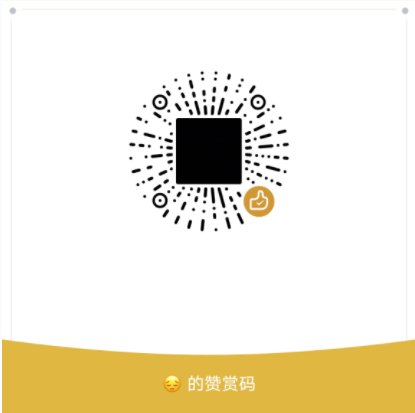
# 好心人打赏记得备注一下，万分感激！有任何问题可以找我。
## 打赏超过25块钱的，可以找我拿启智云的免费A100 40G显卡跑图脚本，长期可用。(链接：https://openi.pcl.ac.cn/2575044704/stable-diffusion-webui-v1.6.1)
# 我的联系QQ： 2575044704  云端部署群：632428790

In [ ]:
%cd stable-diffusion-webui
!/kaggle/opt/conda/envs/venv/bin/python3 launch.py --xformers --administrator --ngrok=2LpUQuhU9NX1nt0XdzCWAoKDMZG_73C2wx9MCdwCVcrn65aCD

In [ ]:
# 这个代码是用来打包SadTalker生成的视频的，保存至SadTalker.zip里
!zip -r /kaggle/working/SadTalker.zip  /kaggle/working/stable-diffusion-webui/results/*

## 我的其它一些云端部署项目，感兴趣来看看：
### Stable Diffusion ComfyUI：https://www.kaggle.com/code/qq2575044704/stable-diffusion-comfyui-sdxl
### Lora训练：https://www.kaggle.com/code/qq2575044704/lora-train-kaggle-lora

# 使用帮助
## kaggle账号
- 注册账号需要手机号，国内手机号也行，如果点击注册后没反应，估计是需要梯子，用于人机验证
- 注册后点此笔记的 **Copy & Edit** 按钮就进到编辑界面
- 如果没有按规定操作可能会导致封号

## **准备工作**
1. 右侧面板 **Settings/ACCELERATOR** 需要选择GPU **P100 或 T4x2** 这两据说有差异，但我用起来差不多
2. 右侧面板 **Settings/LANGUAGE** 需要选择Python
~~2. 右侧面板 **Settings/PERSISTENCE** 建议选择 Files only **作用是保存Outpot目录内的文件**~~(不能用File Only)
3. 右侧面板 **Settings/ENVIRONMENT** 建议不改这个配置，使用当前默认值就行
4. 右侧面板 **Settings/INTERNET** 需要打开 用于联网，没网跑不起来的啊

## **启动**
### 启动方式一  **直接点击页面上边的 RunAll**
- 手机端可能会出现页面上边的工具栏不显示的情况，左侧菜单按钮里也有相关的操作
- 长时间不操作页面会导致脚本停止 （应该是40分钟吧）
### - <span style="color:red; font-weight:;">一旦关机后所有目录都会被清空，不会被保存</span>
### 启动方式二  **使用页面上边的 Save Version 后台运行！！！！！**
- 后台运行不用担心长时间不操作脚本停止
- Version Type 选择 **Save & Run All**
- 在Save Version弹窗里需要选择使用**GPU**环境 （Advanced Settings 里最后一个选项）
- 后台运行的输出的图片可以在运行结束后在Output下载


## **访问**
# Kaggle没有自带的内网穿透，sd的7860端口是进不去的，需要使用第三方内网穿透工具
- 目前可使用的内网穿透是ngrok和frp，较为稳定，暂时不会出现bug。
- 如果需要低价frp内网穿透服务器，请找群主购买

## **增加模型**
# 方法一：
通过下载连接下载到Kaggle
Kaggle的宽带很快，300MB/s，不到30秒就下好大模型了
# 方法二：
1. 先创建数据集，也就是dataset
2. 创建时需要添加文件，选择自己的模型文件就行
3. 同类型文件放相同的数据集里面，一个数据集也不要太大
4. 可以在dataset搜索其他人上传的模型
5. 通过右侧的 **Add Data** 按钮选择已经上传的模型文件或者别人上传的模型文件
    - input 下面的列表就是模型文件，可以点击名称后面的复制按钮复制路径
6. 将模型路径放在配置里的对应配置里即可，支持文件夹和文件路径，参考
    - 如果目录里还有子目录也是需要加载的，可以用*表示子目录 例子：比如Loras目录下还有角色、画风、涩涩的文件夹，那路径里写成 '/kaggle/input/Loras/*'就可以加载子目录里面的文件了
    - 模型加载使用的文件链接方式，如果你融模型的时候新模型名字和原有模型名字一样，会出现不能修改只读文件的错误
    - 同理，直接对模型做编辑的工具可能也会出现相同的错误
    
 

## **一些可能没用的说明**
- 配置说明 **True或者False**表示布尔值 **True**表示“**是**” **False**表示“**否**” 只有这两个值
- 配置说明 **[]** 表示数组，里面可以存放内容，每个内容需要用**英语(半角)逗号**隔开
- 配置说明 **''或者""** 英语(半角)的双引号或者单引号包裹的内容是**字符串**，比如放在数组里面的路径就需要是一个字符串
- 配置说明 **#** **#** 后面的内容是**注释**，是帮助性内容，对整个代码的执行不会有影响


 ### 运行之前请检查GPU和Internet是否已经打开
### 如果出现报错，最有效的解决方法是先将PERSISTENCE改为No，再重新启动，相当于清除数据重新安装
## 如果链接无法打开，请换内网穿透方式。
## 生成的图片历史在Output目录里的archive.zip，也可以从webui的图库浏览器里看

 # 群号码：632428790

In [ ]:
#测试用
!cp -r /kaggle/opt/conda/envs/venv /kaggle/working

!/kaggle/opt/conda/envs/venv/bin/python3 -m "pip" install insightface

%cd /kaggle/working/opt/conda/envs

!find . ! -name 'venv_2024.2.18.tar.bak' -exec rm -rf {} +

%cd /kaggle/working

!tar -cvf /kaggle/working/venv_2024.2.18.tar.bak ./venv

-----------------

# > <span style="color:green; font-weight:;">附录：sd启动参数</span>
常见的：

*
 --xformers 尝试使用xformers 

--force-enable-xformers 强制使用xformers


  --xformers-flash-attention 启用具有Flash Attention的xformers
  
   --no-half-vae   VAE全精度(可以解决黑图问题)
   
 --no-hashing 取消模型哈希计算值*
 --api 启用api

In [ ]:
'''
  -h, --help            显示此帮助消息并退出
  --update-all-extensions
                        launch.py 参数：在启动程序时下载所有扩展的更新
  --skip-python-version-check
                        launch.py 参数：不检查Python版本
  --skip-torch-cuda-test
                        launch.py 参数：不检查CUDA是否能正常工作
  --reinstall-xformers  launch.py 参数：安装适当版本的xformers，即使您已经安装了某个版本
  --reinstall-torch     launch.py 参数：安装适当版本的torch，即使您已经安装了某个版本
  --update-check        launch.py 参数：在启动时检查更新
  --test-server         launch.py 参数：配置用于测试的服务器
  --skip-prepare-environment
                        launch.py 参数：跳过所有环境准备步骤
  --skip-install        launch.py 参数：跳过软件包的安装
  --data-dir DATA_DIR   存储所有用户数据的基本路径
  --config CONFIG       构建模型的配置文件路径
  --ckpt CKPT           稳定扩散模型的检查点路径；如果指定了此参数，该检查点将添加到检查点列表并加载
  --ckpt-dir CKPT_DIR   包含稳定扩散检查点的目录路径
  --vae-dir VAE_DIR     包含VAE文件的目录路径
  --gfpgan-dir GFPGAN_DIR
                        GFPGAN目录
  --gfpgan-model GFPGAN_MODEL
                        GFPGAN模型文件名
  --no-half             不将模型切换为16位浮点数
  --no-half-vae         不将VAE模型切换为16位浮点数
  --no-progressbar-hiding
                        不在gradio UI中隐藏进度条（因为它会减慢浏览器中的硬件加速）
  --max-batch-count MAX_BATCH_COUNT
                        UI的最大批次计数值
  --embeddings-dir EMBEDDINGS_DIR
                        文本反演的嵌入目录（默认为embeddings）
  --textual-inversion-templates-dir TEXTUAL_INVERSION_TEMPLATES_DIR
                        包含文本反演模板的目录路径
  --hypernetwork-dir HYPERNETWORK_DIR
                        超网络目录
  --localizations-dir LOCALIZATIONS_DIR
                        本地化目录
  --allow-code          允许从Web界面执行自定义脚本
  --medvram             启用稳定扩散模型的优化，以牺牲一些速度以实现低VRM使用率
  --lowvram             启用稳定扩散模型的优化，以牺牲大量速度以实现非常低的VRM使用率
  --lowram              将稳定扩散检查点权重加载到VRAM而不是RAM中
  --always-batch-cond-uncond
                        禁用条件/非条件批处理，该批处理可通过--medvram或--lowvram来节省内存
  --unload-gfpgan       无任何操作。
  --precision {full,autocast}
                        在此精度下进行评估
  --upcast-sampling     上升采样。对于--no-half没有影响。通常与--no-half相比，产生类似的结果，性能更好，同时使用更少的内存。
  --share               对gradio使用share=True，并使UI可以通过其网站访问
  --ngrok NGROK         ngrok的认证令牌，替代gradio --share
  --ngrok-region NGROK_REGION
                        无任何操作。
  --ngrok-options NGROK_OPTIONS
                        以JSON格式传递给ngrok的选项，例如：
                        '{"authtoken_from_env":true,
                        "basic_auth":"user:password",
                        "oauth_provider":"google",
                        "oauth_allow_emails":"user@asdf.com"}'
  --enable-insecure-extension-access
                        禁用其他选项，启用扩展选项
  --codeformer-models-path CODEFORMER_MODELS_PATH
                        包含codeformer模型文件的目录路径。
  --gfpgan-models-path GFPGAN_MODELS_PATH
                        包含GFPGAN模型文件的目录路径。
  --esrgan-models-path ESRGAN_MODELS_PATH
                        包含ESRGAN模型文件的目录路径。
  --bsrgan-models-path BSRGAN_MODELS_PATH
                        包含BSRGAN模型文件的目录路径。
  --realesrgan-models-path REALESRGAN_MODELS_PATH
                        包含RealESRGAN模型文件的目录路径。
  --clip-models-path CLIP_MODELS_PATH
                        包含CLIP模型文件的目录路径。
  --xformers            启用xformers的交叉注意力层
  --force-enable-xformers
                        启用xformers的交叉注意力层，无论检查代码是否认为您可以运行它；如果此操作无法正常工作，请不要提交错误报告
  --xformers-flash-attention
                        启用具有Flash Attention的xformers，以提高可重现性（仅适用于SD2.x或变体）
  --deepdanbooru        无任何操作。
  --opt-split-attention
                        首选Doggettx的交叉注意力层优化，用于自动选择优化方式
  --opt-sub-quad-attention
                        首选内存高效的次二次交叉注意力层优化，用于自动选择优化方式
  --sub-quad-q-chunk-size SUB_QUAD_Q_CHUNK_SIZE
                        用于次二次交叉注意力层优化的查询块大小
  --sub-quad-kv-chunk-size SUB_QUAD_KV_CHUNK_SIZE
                        用于次二次交叉注意力层优化的kv块大小
  --sub-quad-chunk-threshold SUB_QUAD_CHUNK_THRESHOLD
                        用于次二次交叉注意力层优化的VRAM阈值的百分比，以使用块处理
  --opt-split-attention-invokeai
                        首选InvokeAI的交叉注意力层优化，用于自动选择优化方式
  --opt-split-attention-v1
                        首选旧版本的分割注意力优化，用于自动选择优化方式
  --opt-sdp-attention   首选缩放点积交叉注意力层优化，用于自动选择优化方式；需要PyTorch 2.*
  --opt-sdp-no-mem-attention
                        首选没有内存高效注意力的缩放点积交叉注意力层优化，用于自动选择优化方式，使图像生成具有确定性；需要PyTorch 2.*
  --disable-opt-split-attention
                        首选不进行交叉注意力层优化，用于自动选择优化方式
  --disable-nan-check   不检查生成的图像/潜空间是否包含NaN；在没有检查点的情况下运行时很有用
  --use-cpu USE_CPU [USE_CPU ...]
                        使用CPU作为指定模块的torch设备
  --listen              使用0.0.0.0作为服务器名称启动gradio，以响应网络请求
  --port PORT           使用给定的服务器端口启动gradio，对于<1024的端口，您需要root/admin权限，默认为7860（如果可用）
  --show-negative-prompt
                        无任何操作。
  --ui-config-file UI_CONFIG_FILE
                        用于ui配置的文件名
  --hide-ui-dir-config  隐藏Web界面中的目录配置
  --freeze-settings     禁用编辑设置
  --ui-settings-file UI_SETTINGS_FILE
                        用于ui设置的文件名
  --gradio-debug        使用--debug选项启动gradio
  --gradio-auth GRADIO_AUTH
                        设置gradio的身份验证，格式为“username:password”；或者使用逗号分隔多个，例如“u1:p1,u2:p2,u3:p3”
  --gradio-auth-path GRADIO_AUTH_PATH
                        设置gradio的身份验证文件路径，例如“/path/to/auth/file”，与--gradio-auth具有相同的身份验证格式
  --gradio-img2img-tool GRADIO_IMG2IMG_TOOL
                        无任何操作。
  --gradio-inpaint-tool GRADIO_INPAINT_TOOL
                        无任何操作。
  --gradio-allowed-path GRADIO_ALLOWED_PATH
                        将路径添加到gradio的allowed_paths，使其可以从中提供文件
  --opt-channelslast    将稳定扩散的内存类型更改为channels last
  --styles-file STYLES_FILE
                        用于样式的文件名
  --autolaunch          启动后在系统的默认浏览器中打开Web界面的URL
  --theme THEME         使用浅色或深色主题启动UI
  --use-textbox-seed    在UI中使用文本框作为种子（没有上/下箭头，但可以输入长种子）
  --disable-console-progressbars
                        不将进度条输出到控制台
  --enable-console-prompts
                        使用txt2img和img2img生成时，在控制台打印提示
  --vae-path VAE_PATH   用作VAE的检查点；设置此参数会禁用与VAE相关的所有设置
  --disable-safe-unpickle
                        禁用检查PyTorch模型是否包含恶意代码
  --api                 使用api=True同时启动API和Web界面（仅使用--nowebui启动API）
  --api-auth API_AUTH   设置API的身份验证，格式为“username:password”；或者使用逗号分隔多个，例如“u1:p1,u2:p2,u3:p3”
  --api-log             使用api-log=True启用所有API请求的日志记录
  --nowebui             使用api=True启动API而不是Web界面
  --ui-debug-mode       不加载模型，快速启动UI
  --device-id DEVICE_ID
                        选择要使用的默认CUDA设备（在之前需要导出CUDA_VISIBLE_DEVICES=0,1等）
  --administrator       管理员权限
  --cors-allow-origins CORS_ALLOW_ORIGINS
                        以逗号分隔的列表形式的允许CORS源（无空格）
  --cors-allow-origins-regex CORS_ALLOW_ORIGINS_REGEX
                        单个正则表达式形式的允许CORS源
  --tls-keyfile TLS_KEYFILE
                        部分启用TLS，需要--tls-certfile才能完全工作
  --tls-certfile TLS_CERTFILE
                        部分启用TLS，需要--tls-keyfile才能完全工作
  --disable-tls-verify  通过此参数启用使用自签名证书。
  --server-name SERVER_NAME
                        设置服务器的主机名
  --gradio-queue        无任何操作。
  --no-gradio-queue     禁用gradio队列；导致网页使用HTTP请求而不是Websockets；在早期版本中是默认设置
  --skip-version-check  不检查torch和xformers的版本
  --no-hashing          禁用检查点的sha256哈希，以提高加载性能
  --no-download-sd-model
                        即使在--ckpt-dir中找不到模型，也不下载SD1.5模型
  --subpath SUBPATH     自定义gradio的子路径，与反向代理一起使用
  --add-stop-route      添加/_stop路由以停止服务器
  '''

---------------

# NoteBook Created By 2575044704
# Stable Diffusion By AUTOMATIC1111
# DO NOT PRODUCE NSFW IMAGE!! it violates the Kaggle rules, learn more: https://www.kaggle.com/community-guidelines

# <div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 2022年11月18日: Created By Yiyiooo
</div>
最近更新日志：
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年3月5日更新：现在支持通过下载链接上传模型了，省去了下载模型后再上传后的麻烦.（）
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年5月15日更新：现在可以双开webui了，可以双线程跑图（GPU请选择 T4 x2 ， 将use2设置为True）
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年5月15日更新：更新了多线程启动，启动速度更快一些
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年6月6日更新：更新了xformers版本，生成速度更快一些
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年7月19日更新：更新了图片自动打包和删除功能，顺便添加了一些注释
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年7月21日更新：更新了默认Cross Attention启动参数，据说可以加快20%生成速度
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年9月21日更新：更新了xformers版本，更新了内网穿透，之前的版本不能用了
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年10月14日更新：更新了一些说明
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年11月4日更新：更新了animatediff
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2023年11月6日更新：更新了自定义文件名
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2024年1月1日更新：打个卡，太久没更别人以为我不做公益了
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2024年1月25日更新：修复了一些bug
</div>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
     2024年2月3日更新：解决了Python not found的BUG
</div>